<img src="../../img/logo_white_bkg_small.png" align="left" /> 
# Working with Two Dimensional Data
This worksheet covers concepts covered in the second part of day 1 - Working with Data in Two Dimensions.  It should take no more than 20-30 minutes to complete.  Please raise your hand if you get stuck.  

There are many ways to accomplish the tasks that you are presented with, however you will find that by using the techniques covered in class, the exercises should be relatively simple. 

## Import the Libraries
For this exercise, we will be using:
* Pandas (http://pandas.pydata.org/pandas-docs/stable/)
* Numpy (https://docs.scipy.org/doc/numpy/reference/)
* Matplotlib (http://matplotlib.org/api/pyplot_api.html)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import apache_log_parser
import seaborn as sns
from user_agents import parse
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Exercise 1: Reading various forms of JSON Data
In the `/data/` folder, you will find a series of `.json` files called `dataN.json`, numbered 1-4.  Each file contains the following data:


| |birthday	| first_name |last_name |
|--|-----------|------------|----------|
|0	|5\/3\/67	|Robert	|Hernandez |
|1	|8\/4\/84	|Steve	|Smith |
|2	|9\/13\/91	|Anne	|Raps |
|3	|4\/15\/75	|Alice	|Muller |

Using the `.read_json()` function and the various configuration options, read all these files into a dataframe.  The documentation is available here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html.

In [3]:
df1 = pd.read_json('../../data/data1.json')
df1

,birthday,first_name,last_name
0,5\/3\/67,Robert,Hernandez
1,8\/4\/84,Steve,Smith
2,9\/13\/91,Anne,Raps
3,4\/15\/75,Alice,Muller


In [4]:
df2 = pd.read_json('../../data/data2.json', orient='index')
df2

,birthday,first_name,last_name
0,5\/3\/67,Robert,Hernandez
1,8\/4\/84,Steve,Smith
2,9\/13\/91,Anne,Raps
3,4\/15\/75,Alice,Muller


In [5]:
df3 = pd.read_json('../../data/data3.json', orient='columns')
df3

,birthday,first_name,last_name
0,5\/3\/67,Robert,Hernandez
1,8\/4\/84,Steve,Smith
2,9\/13\/91,Anne,Raps
3,4\/15\/75,Alice,Muller


In [6]:
df4 = pd.read_json('../../data/data4.json', orient='split')
df4

,first_name,last_name,birthday
0,Robert,Hernandez,5\/3\/67
1,Steve,Smith,8\/4\/84
2,Anne,Raps,9\/13\/91
3,Alice,Muller,4\/15\/75


## Exercise 2: 
In the data file, there is a webserver file called `hackers-access.httpd`.  For this exercise, you will use this file to answer the following questions:
1.  Which browsers are the top 10 most used browsers in this data?
2.  Which are the top 10 most used operating systems?

In order to accomplish this task, do the following:
1.  Write a function which takes a User Agent string as an argument and returns the relevant data.  HINT:  You might want to use python's `user_agents` module, the documentation for which is available here: (https://pypi.python.org/pypi/user-agents)
2.  Next, apply this function to the column which contains the user agent string.
3.  Store this series as a new column in the dataframe
4.  Count the occurances of each value in the new columns using the `.value_counts()` function.
5.  Using the `.plot(kind='bar')` function, plot the number of GET and POST requests.

In [7]:
import apache_log_parser
from user_agents import parse
#Read in the log file
line_parser = apache_log_parser.make_parser("%h %l %u %t \"%r\" %>s %b \"%{Referer}i\" \"%{User-agent}i\"")

server_log = open("../../data/hackers-access.httpd", "r")
parsed_server_data = []
for line in server_log:
    data = {}
    data = line_parser(line)
    parsed_server_data.append( data )

server_df = pd.DataFrame( parsed_server_data  )

In [8]:
#Write the functions
def get_os(x):
    user_agent = parse(x)
    return user_agent.os.family

def get_browser(x):
    user_agent = parse(x)
    return user_agent.browser.family

In [9]:
#Apply the functions to the dataframe
server_df['os'] = server_df['request_header_user_agent'].apply( get_os )
server_df['browser'] = server_df['request_header_user_agent'].apply( get_browser )

In [10]:
#Get the top 10 values
server_df['os'].value_counts().head(10)

Windows 7        2041
Windows Vista     500
Windows XP        423
Windows 8.1       221
Linux             125
Mac OS X           80
Chrome OS          60
Ubuntu              6
Name: os, dtype: int64

In [11]:
server_df['browser'].value_counts().head(10)

Firefox    1476
Chrome      789
Opera       556
Dragon      533
IE           78
Safari       24
Name: browser, dtype: int64

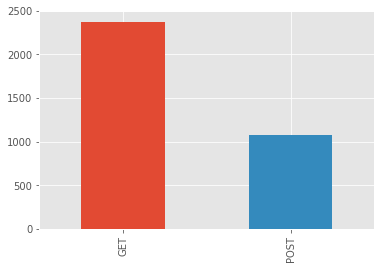

In [13]:
server_df['request_method'].value_counts().plot( kind='bar')

## Extra Credit

To do this exercise, you'll need to install the geolite2 (https://github.com/rr2do2/maxminddb-geolite2) module by entering:

`pip install maxminddb-geolite2`

Next, add columns for the country, country code, and lat/long.  Your task is to count the number of occurrences of each country for `GET` and `POST` requests.


In [18]:
from geolite2 import geolite2

def getCountry( x ):    
    reader = geolite2.reader()
    result = ""
    try:
        result = reader.get(x)['country']['names']['en']
    except:
        result = "Unknown"
    return result

In [21]:
server_df[server_df['request_method'] == "GET"]['remote_host'].apply( getCountry ).value_counts().head(10)

United States        1242
Thailand              219
Canada                170
Germany               141
Romania               115
China                 109
France                102
Sweden                 32
Fiji                   22
Republic of Korea      20
Name: remote_host, dtype: int64

If you're really wanting to go all out, try using GeoPandas to make a Choropleth map... but that's for another class.

# Exercise 3:
Using the `dailybots.csv` film, read the file into a DataFrame and perform the following operations:
1.  Filter the DataFrame to include bots from the Government/Politics Industry.
2.  Calculate the ratio of hosts to orgs and add this as a column to the DataFrame and output the result
3.  Calculate the total number of hosts infected by each BotFam in the Government/Politics Industry.  You should use the `groupby()` function which is documented here: (http://pandas.pydata.org/pandas-docs/stable/groupby.html)


In [14]:
bots = pd.read_csv('../../data/dailybots.csv')
bots.head()

,date,botfam,industry,hosts,orgs
0,2016-06-01,Bedep,Education,88,33
1,2016-06-01,Bedep,Finance,387,17
2,2016-06-01,Bedep,Government/Politics,430,42
3,2016-06-01,Bedep,Healthcare/Wellness,42,19
4,2016-06-01,Bedep,Manufacturing,184,18


In [15]:
gov_bots = bots[['botfam', 'hosts']][bots['industry'] == "Government/Politics"]

In [16]:
gov_bots.groupby('botfam', as_index=False).sum()

,botfam,hosts
0,Bedep,6183
1,ConfickerAB,28818
2,Necurs,12425
3,Olmasco,83
4,PushDo,2164
5,Ramnit,4484
6,Sality,7466
7,Zeus,965
8,Zusy,227
9,zeroaccess,886
